In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skab-anomaly-detection/SKAB-master/LICENSE
/kaggle/input/skab-anomaly-detection/SKAB-master/.gitignore
/kaggle/input/skab-anomaly-detection/SKAB-master/README.md
/kaggle/input/skab-anomaly-detection/SKAB-master/utils/t2.py
/kaggle/input/skab-anomaly-detection/SKAB-master/utils/__init__.py
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/contributing.md
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/pictures/skab.png
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/pictures/testbed.png
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/pictures/nab-metric.jpg
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/hotelling_q.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/mscred.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/isolation_forest.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/VAE.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/LSTM-AE.ipynb
/kaggle/input/skab-anomaly-d

# Introductory Summary

1. Dataset : SKAB

2. Sturcture : Input - 1D Conv - 1D Conv - 1D DeConv - 1D DeConv - 1D DeConv - Recontructed Input

3. Activation Function : ReLU

4. Framework : Keras



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
#경로 마지막에 /data 폴더 추가
os.walk('/kaggle/input/skab-anomaly-detection/SKAB-master/data/')

<generator object walk at 0x7fcbb554d050>

In [4]:
list(os.walk('/kaggle/input/skab-anomaly-detection/SKAB-master/data/'))[0]

('/kaggle/input/skab-anomaly-detection/SKAB-master/data/',
 ['valve2', 'other', 'valve1', 'anomaly-free'],
 ['README.md', 'Load data.ipynb'])

In [5]:
list(os.walk('/kaggle/input/skab-anomaly-detection/SKAB-master/data/'))[1]

('/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2',
 [],
 ['1.csv', '3.csv', '2.csv', '0.csv'])

In [6]:
list(os.walk('/kaggle/input/skab-anomaly-detection/SKAB-master/data/'))[4]

('/kaggle/input/skab-anomaly-detection/SKAB-master/data/anomaly-free',
 [],
 ['anomaly-free.csv'])

In [7]:
# make a list(all_files) of csv files
# search the all dirs,files for every root(Top-Down approach)

all_files =[]
for root, dirs, files in os.walk('/kaggle/input/skab-anomaly-detection/SKAB-master/data/'):
    for file in files:
        if file.endswith('.csv'):
            all_files.append(os.path.join(root,file))
        

In [8]:
all_files

['/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/1.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/3.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/2.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/0.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/1.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/11.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/3.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/5.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/2.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/13.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/14.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/4.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/8.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/12.csv',
 '/kaggle/in

In [9]:
list_of_df = [pd.read_csv(file,
                            #seperated with ';' in csv file
                            sep = ';',
                            index_col = 'datetime',
                            ) for file in all_files if 'anomaly-free' not in file]


In [10]:
[file for file in all_files if 'anomaly-free' not in file]    #list of 'anomaly-free' data 

['/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/1.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/3.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/2.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/valve2/0.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/1.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/11.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/3.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/5.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/2.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/13.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/14.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/4.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/8.csv',
 '/kaggle/input/skab-anomaly-detection/SKAB-master/data/other/12.csv',
 '/kaggle/in

In [11]:
list_of_df[0]

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0000,0.0,0.0
2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0000,0.0,0.0
2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0000,0.0,0.0
2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0000,0.0,0.0
2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-09 16:36:26,0.026954,0.040592,1.200720,0.054711,67.6181,24.2314,245.247,32.0000,0.0,0.0
2020-03-09 16:36:27,0.027371,0.040530,1.318550,-0.273216,67.8733,24.2234,243.576,32.0000,0.0,0.0
2020-03-09 16:36:28,0.027557,0.039432,1.068740,0.054711,67.6173,24.2315,239.957,31.9603,0.0,0.0


In [12]:
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0],
                             sep = ';',
                             index_col = 'datetime')

In [13]:
anomaly_free_df

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2020-02-08 13:30:47,0.202394,0.275154,2.16975,0.382638,90.6454,26.8508,238.852,122.664
2020-02-08 13:30:48,0.203153,0.277857,2.07999,-0.273216,90.7978,26.8639,227.943,122.338
2020-02-08 13:30:50,0.202054,0.275790,2.52577,0.382638,90.7730,26.8603,223.486,121.338
2020-02-08 13:30:51,0.203595,0.278101,2.49742,0.054711,90.8424,26.8616,244.904,121.664
2020-02-08 13:30:52,0.201889,0.276363,2.29194,0.710565,90.6664,26.8603,239.196,122.000
...,...,...,...,...,...,...,...,...
2020-02-08 16:16:43,0.225744,0.267921,2.91598,0.054711,88.8593,29.3792,219.542,126.000
2020-02-08 16:16:44,0.205870,0.258370,1.71505,0.710565,89.1754,29.3692,221.862,126.000
2020-02-08 16:16:45,0.219222,0.267244,2.35834,-0.273216,89.1306,29.3674,226.050,126.679


In [14]:
#size
len(list_of_df)

34

In [15]:
# data shape
list_of_df[0].shape

(1063, 10)

In [16]:
list_of_df[1].shape

(995, 10)

In [17]:
#change_point number
sum([len(df[df.changepoint == 1.0])for df in list_of_df])

129

In [18]:
# outlier number
sum([len(df[df.anomaly == 1.0]) for df in list_of_df])

13067

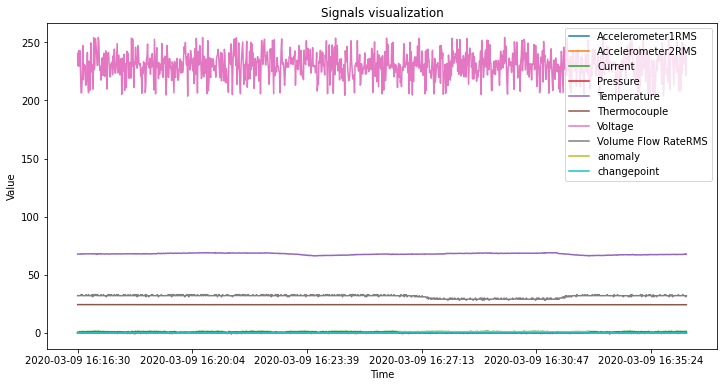

In [19]:
#visualization
list_of_df[0].plot(figsize = (12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals visualization')
plt.show()

In [20]:
#preprocessing(integrating scales), since the scales are different for each sensors
#standardization(표준화)- subtract AVG then dividie by STD / normalization(정규화)- converting to a value between 0 and 1

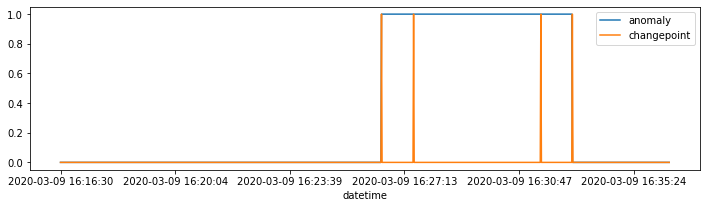

In [21]:
list_of_df[0].anomaly.plot(figsize = (12,3))
list_of_df[0].changepoint.plot()
plt.legend()
plt.show()

## Preprocessing & Model Pipeline

In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#functions for calculating errors
from sklearn.metrics import mean_absolute_error, mean_squared_error #mean_squared - emphasizes its error when it's larger than 1
#spliting data
from sklearn.model_selection import train_test_split
#standardization
from sklearn.preprocessing import StandardScaler


In [23]:
# seed값 맞춰주기
# 모델을 사용하거나 데이터 shuffle or random 사용
# the performanc may vary, dependant on the random(seed) value
# must use the same seed value
# 모델 성능 비교할 때 seed값을 같게하여야 한다
def Random(seed_value):
    import os
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    import random
    random.seed(seed_value)
    np.random.seed(seed_value)
    import tensorflow as tf
    tf.random.set_seed(seed_value)

## Modeling

In [24]:
#Convolutional Auto Encoder
def convae(data):

    model = keras.Sequential([
        #data input의 shape 명시 
        layers.Input(shape = (data.shape[1], data.shape[2])),
        #1D는 signal에서 주로 사용, 2D는 이미지에서 사용
        # filters : 필터 개수, 특징을 얼마나 많이 뽑을 것인가?
        # kernal_size : 필터 크기, 필터 크기가 클수록 만들어지는 feature size 작아짐
        # padding : 'same' or 'valid' valid는 padding 없는것, same 쓰면 input,output 크기 똑같아짐(단 stride =1 일때)
        #layer 거칠수록 shape 줄어드는걸 방지하기 위해 padding 사용
        #Activation Function : ReLU 연산 빠르고 gradient vanishing 적음
        layers.Conv1D(filters = 32, kernal_size = 7, padding = 'same', strides = 2, activation = 'relu' ),
        layers.Conv1D(filters = 16, kernal_size = 7, padding = 'same', strides = 2, activation = 'relu' ),

        layers.Conv1DTranspose(filters = 16, kernal_size = 7, padding = 'same', strides = 2, activation = 'relu' ),
        layers.Conv1DTranspose(filters = 32, kernal_size = 7, padding = 'same', strides = 2, activation = 'relu' ),

        # model 맨처음에 들어가는 input 크기만 맞춰주기 위해 넣는 layer
        layers.Conv1DTranspose(filters = 1, kernal_size = 7, padding = 'same'),

    ])

    #compile (최적화 optimizer 설정)
    # optimizer 는 adam이 제일 무난, learning rate은 보통 1e-3 ~ 1e-5
    # learning rate 이 가장 중요한 hyper parameter. 제일 먼저 바꾸면서 조정
    # 모델을 떠나서 데이터와 가장 관련이 깊은 hyper parameter 임
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = 'mse')

    # 학습
    history = model.fit(
        # data X (데이터 값), data y(정답값) : supervised learning
        # data X(데이터 값), data X(데이터 값) : unsupervised learning
        data,
        data,
        epochs = 100,
        #gradient 계산할 때 데이터를 몇개를 한묶음으로 볼지,
        # 수치가 클수록 빠르지만 덜정확
        batch_size = 32,
        verbose = 10,
        #학습할때 scheduler 걸거나 언제 학습중단할건지
        # scheduler 는 중간에 학습율 바뀌게 하는 것
        # early stopping 자동 학습 중단. patience 5번 loss 상승시 중단
        callbacks = [
            keras.callbacks.EarlyStropping(monitor = 'val_loss', patience = 5, verbose = 0)
        ]

    )
    return history, model

## Anomaly Score